In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from jupyterthemes import jtplot

In [2]:
jtplot.style(theme="monokai",context="notebook",ticks=True,grid=False)


# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel

amazon_review = pd.read 

In [3]:
amazon_review = pd.read_csv("E:\\Projects\\Twitter Sentiment Analysis\\Datasets\\amazon_reviews.csv")

In [4]:
amazon_review.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [5]:
amazon_review.tail()

,rating,date,variation,verified_reviews,feedback
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1
3149,4,29-Jul-18,Black Dot,Good,1


In [6]:
amazon_review.sample(20)

,rating,date,variation,verified_reviews,feedback
3103,5,30-Jul-18,Black Dot,"I love it, it is just what I thought it would ...",1
2762,5,30-Jul-18,Black Dot,I love it. bought one for my daughter and one ...,1
820,5,30-Jul-18,Charcoal Fabric,Has great sound and is very responsive my voic...,1
512,3,21-Jun-18,Black,Started taking on her own! Haven’t used it sin...,1
2009,2,20-Jul-18,White Plus,"At a volume setting of half or less, the speak...",0
105,4,30-Jul-18,Heather Gray Fabric,The speaker is of surprising quality. Happy wi...,1
41,5,30-Jul-18,Charcoal Fabric,My Android would not allow Alexa to connect. F...,1
693,5,17-May-18,White,Works perfect! There’s no difference at all be...,1
484,4,27-Jun-18,White,"A small problem out of the box, but a rep from...",1
1929,4,26-Jul-18,Black Plus,I love my Echo Plus. The only drawback is that...,1


The dataset has 5 columns.

The first is rating where 1 means poor and 5 means best

the next column is the date column telling the data of the review.

The third column must be the variation of the devices that amazon offers.

The fourth column depicts the reviews of the customers and we will use this column for our analysis.

The last column is the output column, where 1 means positive sentiment and 0 means negative sentiment.

In [7]:
amazon_review.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [8]:
amazon_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [9]:
amazon_review.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64

In [10]:
amazon_review.dropna(axis=0,inplace=True)

In [11]:
amazon_review[amazon_review["verified_reviews"].isna()]

,rating,date,variation,verified_reviews,feedback


In [12]:
amazon_review["verified_reviews"].dropna(inplace=True)

In [13]:
amazon_review.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3149 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3149 non-null   int64 
 1   date              3149 non-null   object
 2   variation         3149 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3149 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 147.6+ KB


<Axes: >

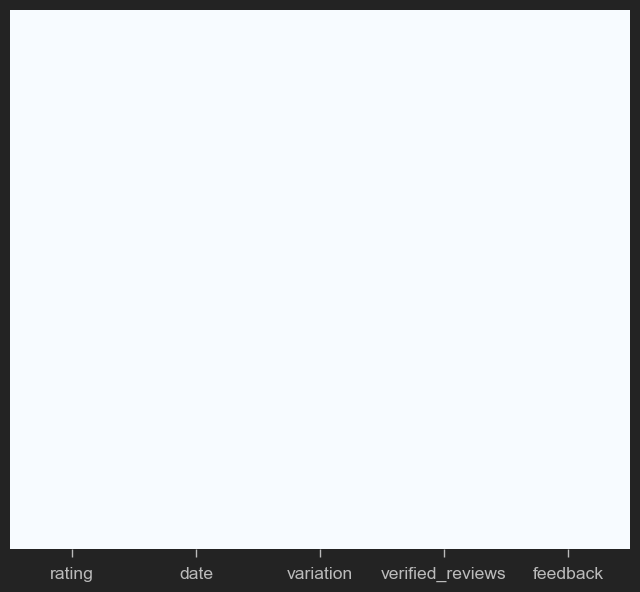

In [14]:
 sns.heatmap(amazon_review.isnull(), yticklabels = False, cbar = False, cmap="Blues")

There is no missing values and there are about 3150 entries. We have 2 integer datatypes and 3 object/string datatypes.

Minimum rating is 1 and maximum is 5 as expected.

There must be skewness in the data as the ratings column has more data around 5.

Date-time must be converted to datetime format for analysis.



In [15]:
amazon_review.columns

Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback'], dtype='object')

In [16]:
pd.to_datetime(amazon_review["date"],format=  '%d-%b-%y')

0      2018-07-31
1      2018-07-31
2      2018-07-31
3      2018-07-31
4      2018-07-31
          ...    
3145   2018-07-30
3146   2018-07-30
3147   2018-07-30
3148   2018-07-30
3149   2018-07-29
Name: date, Length: 3149, dtype: datetime64[ns]

<Axes: >

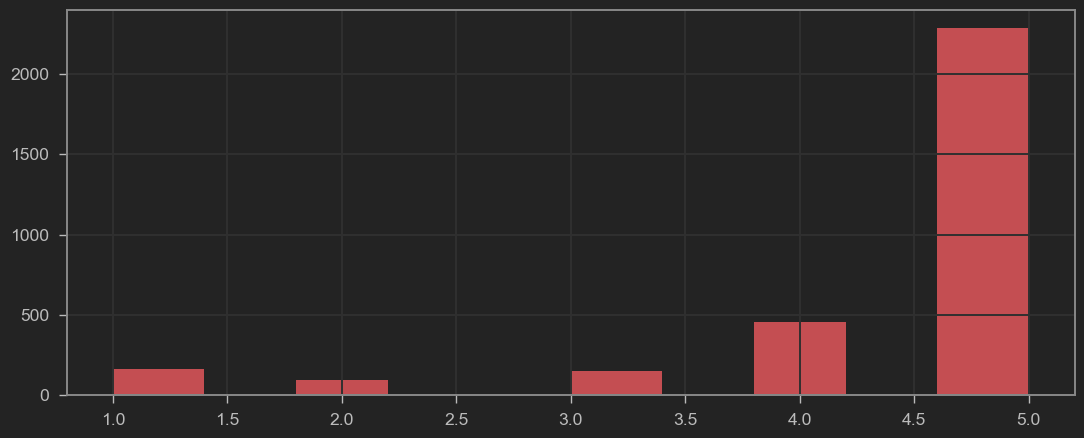

In [17]:
amazon_review["rating"].hist(figsize=(13,5),color="r")

C:\Users\OMEN\AppData\Local\Temp\ipykernel_28384\1401058368.py:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Count")


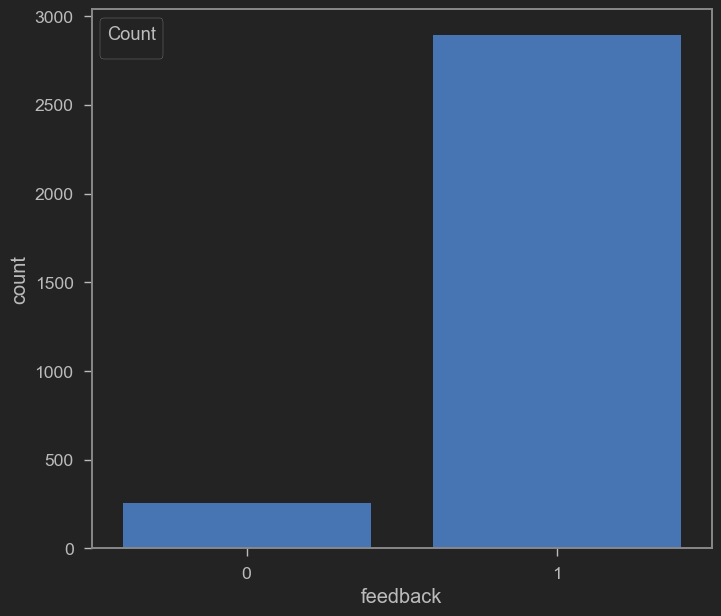

In [18]:
sns.countplot(x="feedback",data=amazon_review)
plt.legend(title="Count")
plt.show()

C:\Users\OMEN\AppData\Local\Temp\ipykernel_28384\156118015.py:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Count")


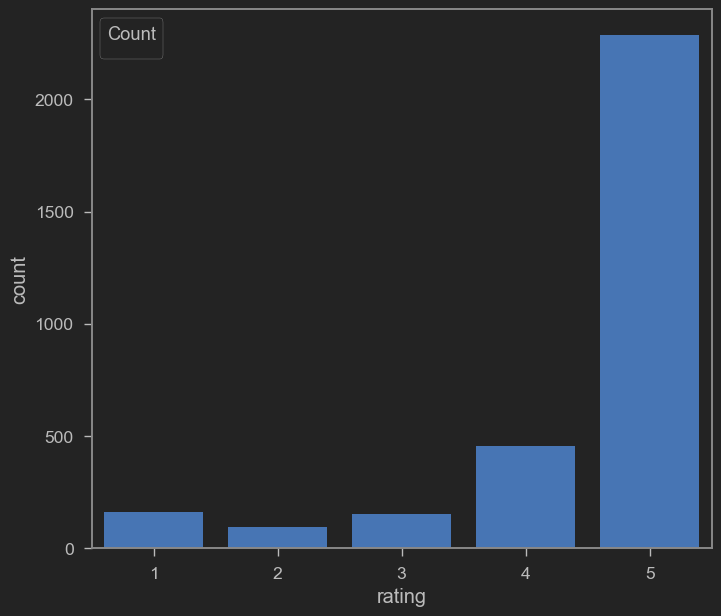

In [19]:
sns.countplot(x="rating",data=amazon_review)
plt.legend(title="Count")
plt.show()


In [20]:
positive = amazon_review[amazon_review["feedback"]==1]

In [21]:
negative = amazon_review[amazon_review["feedback"]==0]

In [22]:
positive.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [23]:
negative.head()

,rating,date,variation,verified_reviews,feedback
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0


I have created two new dataframes one consisting of the positive reviews and the second one containing the negative reviews.

In [24]:
sentences = amazon_review["verified_reviews"].tolist()

In [25]:
len(sentences)

3149

In [26]:
sentences

['Love my Echo!',
 'Loved it!',
 'Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home.',
 'I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.',
 'Music',
 'I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do.',
 'Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet.',
 "I think this is the 5th one I've

In [27]:
sentences_as_one_string = " ".join(sentences)

In [28]:
sentences_as_one_string

'Love my Echo! Loved it! Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home. I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well. Music I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do. Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet. I think this is the 5th one I\'ve purchased. I\'m working on 

In [29]:
!pip install wordcloud

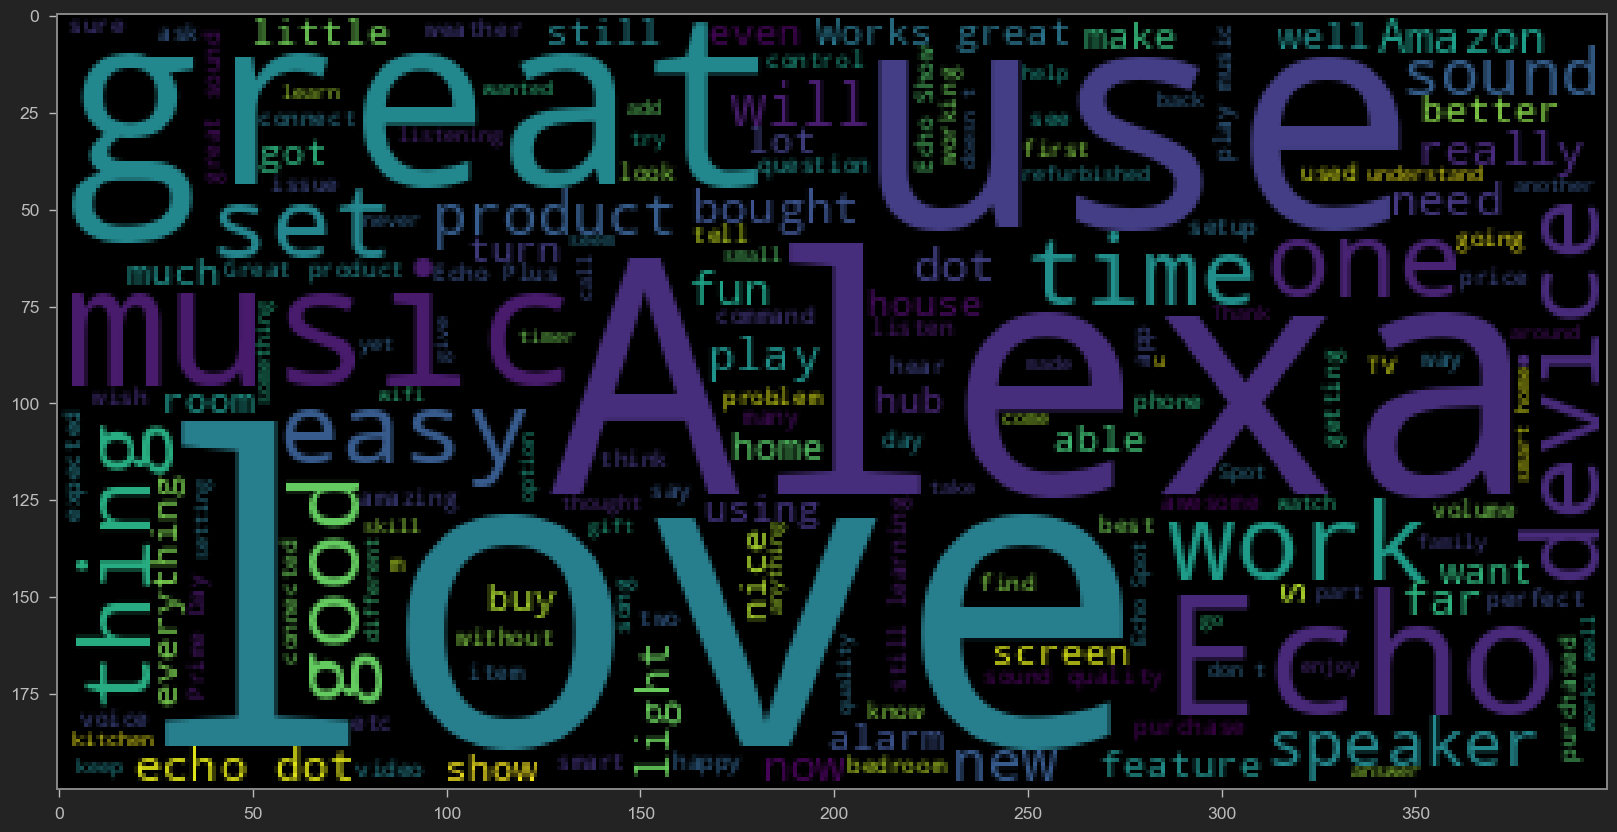

In [30]:
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

In [31]:
negative

,rating,date,variation,verified_reviews,feedback
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0
...,...,...,...,...,...
3047,1,30-Jul-18,Black Dot,Echo Dot responds to us when we aren't even ta...,0
3048,1,30-Jul-18,White Dot,NOT CONNECTED TO MY PHONE PLAYLIST :(,0
3067,2,30-Jul-18,Black Dot,The only negative we have on this product is t...,0
3091,1,30-Jul-18,Black Dot,I didn’t order it,0


In [32]:
negative_list = negative["verified_reviews"].tolist()
print(len(negative_list))
print("*"*100)
print(negative_list)

256
****************************************************************************************************
["It's like Siri, in fact, Siri answers more accurately then Alexa.  I don't see a real need for it in my household, though it was a good bargain on prime day deals.", 'Sound is terrible if u want good music too get a bose', 'Not much features.', "Stopped working after 2 weeks ,didn't follow commands!? Really fun when it was working?", 'Sad joke. Worthless.', 'Really disappointed Alexa has to be plug-in to wall socket all the time.  My fault for not checking this, but made the assumption that a company has technologically advanced as Amazon would sell this product with a rechargeable battery.  If I could return it, I would as my Apple music and boom speaker give me more flexibility the Alexa.', "It's got great sound and bass but it doesn't work all of the time. Its still hot or miss when it recognizes things", "I am not super impressed with Alexa. When my Prime lapsed, she wouldn't 

In [33]:
negative_as_one_string = " ".join(negative_list)

In [34]:
negative_as_one_string

'It\'s like Siri, in fact, Siri answers more accurately then Alexa.  I don\'t see a real need for it in my household, though it was a good bargain on prime day deals. Sound is terrible if u want good music too get a bose Not much features. Stopped working after 2 weeks ,didn\'t follow commands!? Really fun when it was working? Sad joke. Worthless. Really disappointed Alexa has to be plug-in to wall socket all the time.  My fault for not checking this, but made the assumption that a company has technologically advanced as Amazon would sell this product with a rechargeable battery.  If I could return it, I would as my Apple music and boom speaker give me more flexibility the Alexa. It\'s got great sound and bass but it doesn\'t work all of the time. Its still hot or miss when it recognizes things I am not super impressed with Alexa. When my Prime lapsed, she wouldn\'t play anything. She isn\'t smart enough to differentiate among spotify accounts so we can\'t use it for that either. She r

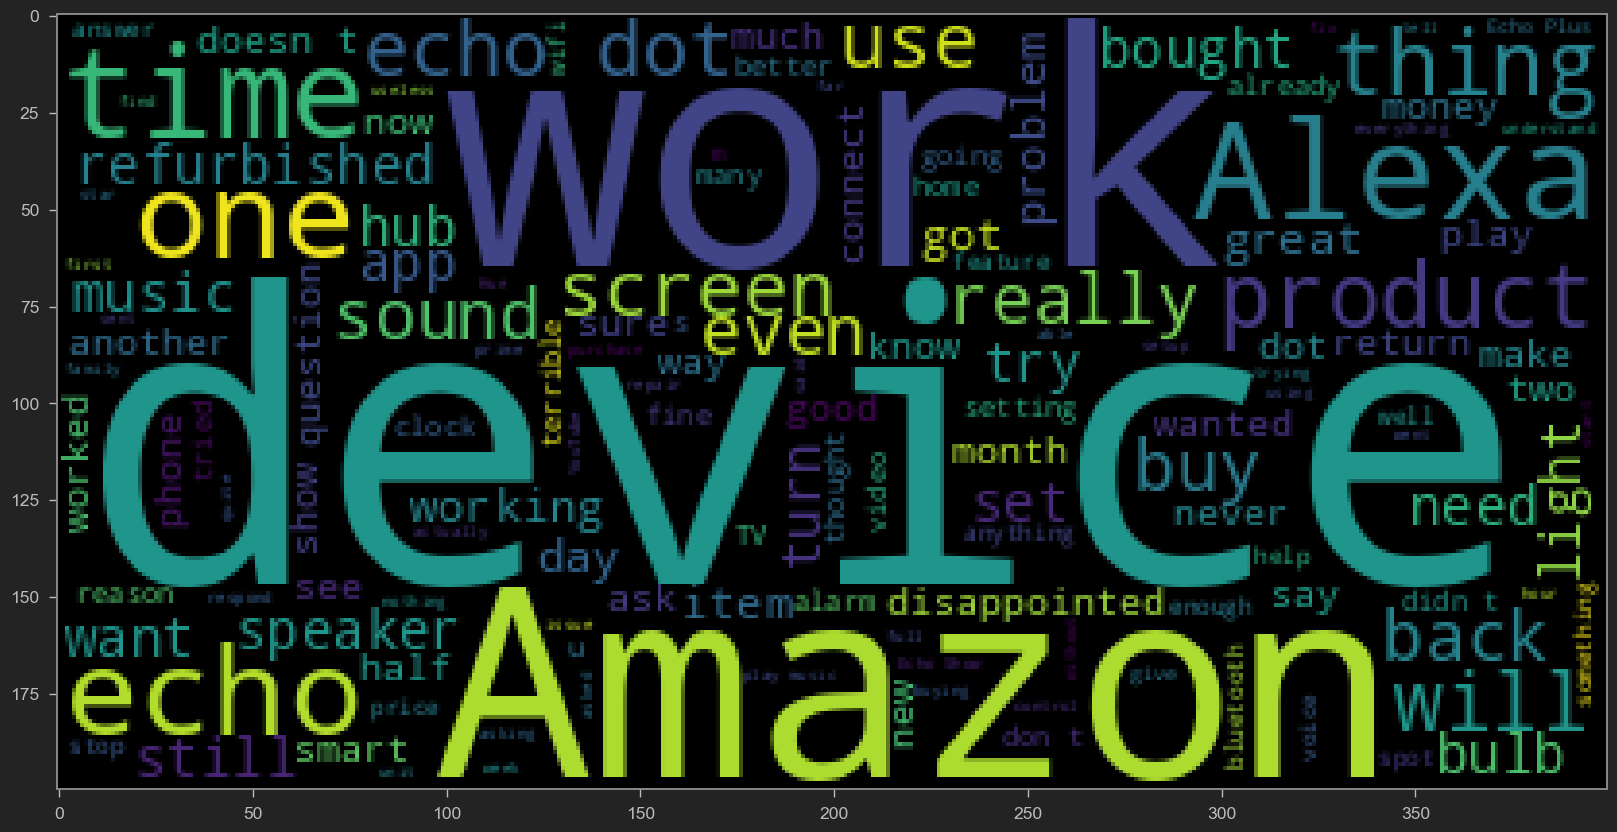

In [35]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(negative_as_one_string))

In [36]:
positive_list = positive["verified_reviews"].tolist()

In [37]:

len(positive_list)

2893

In [38]:
positive_as_one_string = " ".join(positive_list)

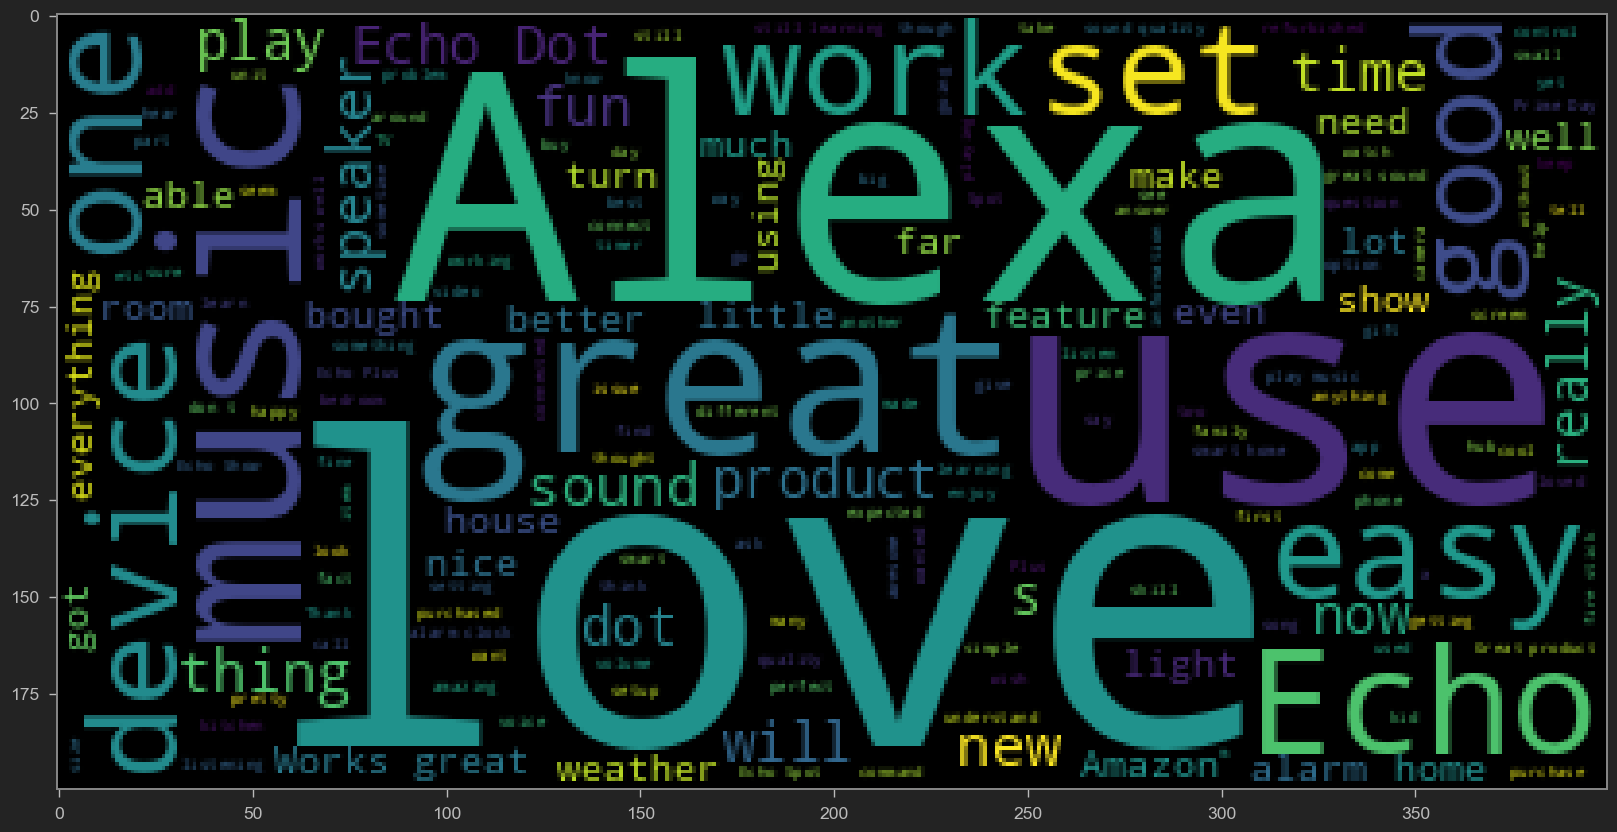

In [39]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(positive_as_one_string))

Now removing the punctuation from the text

In [40]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [48]:
Test = "Hello!, there mate. It's a lovely day. Isn't it?"

l = [word for word in Test if word not in string.punctuation]
print(Test)
print("---------------------")
print(l)

Hello!, there mate. It's a lovely day. Isn't it?
---------------------
['H', 'e', 'l', 'l', 'o', ' ', 't', 'h', 'e', 'r', 'e', ' ', 'm', 'a', 't', 'e', ' ', 'I', 't', 's', ' ', 'a', ' ', 'l', 'o', 'v', 'e', 'l', 'y', ' ', 'd', 'a', 'y', ' ', 'I', 's', 'n', 't', ' ', 'i', 't']


In [52]:
l1 = ''.join(l)
print(l1)

Hello there mate Its a lovely day Isnt it


Removing stopwords


In [54]:
pip install nltk

  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached click-8.1.8-py3-none-any.whl.metadata (2.3 kB)
  Using cached regex-2024.11.6-cp312-cp312-win_amd64.whl.metadata (41 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
Using cached nltk-3.9.1-py3-none-any.whl (1.5 MB)
Using cached regex-2024.11.6-cp312-cp312-win_amd64.whl (273 kB)
Using cached click-8.1.8-py3-none-any.whl (98 kB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
Note: you may need to restart the kernel to use updated packages.


In [55]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\OMEN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [56]:
from nltk.corpus import stopwords
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [57]:
l

['H',
 'e',
 'l',
 'l',
 'o',
 ' ',
 't',
 'h',
 'e',
 'r',
 'e',
 ' ',
 'm',
 'a',
 't',
 'e',
 ' ',
 'I',
 't',
 's',
 ' ',
 'a',
 ' ',
 'l',
 'o',
 'v',
 'e',
 'l',
 'y',
 ' ',
 'd',
 'a',
 'y',
 ' ',
 'I',
 's',
 'n',
 't',
 ' ',
 'i',
 't']

In [ ]:
l2 = [  for word in l if word ot in stopwords.words('english')